# Descriptive Statistics Review

In this second part of the lab, we are going to continue working with the data that we cleaned in the last part. 
Be sure to continue to write clean code and comment your work well!

First, lets import our libraries and the data we saved. 

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Some info:

| Column  | Description  |  Changes performed
|---|---|---|
| Carat  | Weight of the diamond (0.2--5.01)  |
| Cut  | Quality of the cut (Fair, Good, Very Good, Premium, Ideal)  |
| Color  | Diamond colour, from J (worst) to D (best)  | we change to 0 - 6
| Clarity  | A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))   | we change to 0 - 7
| Depth  | Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)  |
| Table  | Width of top of diamond relative to widest point (43--95)  |
| Price  | Price in US dollars (326-18,823)  |
| x  | Length in mm (0--10.74)  |
| y  | Width in mm (0--58.9)  |
| z  | Depth in mm (0--31.8)  |

In [2]:
diamonds = pd.read_csv('diamonds_clean.csv')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,5,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,5,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,0,1,63.3,58.0,335,4.34,4.35,2.75


Now that we cleaned our data, we can proceed with some exploratory analysis. We will analyze the features that affect price the most.

Let's start by looking at how the charateristics of a diamond (especially the price, since that's our focus) change based on its color. Remember that you can use the `groupby()` method in pandas. 

**Using the `describe()` method, take a look on the dataset paying special attention to the variability. Comment what you see.**

In [6]:
diamonds.groupby('color').agg('mean')   

,carat,clarity,depth,table,price,x,y,z
color,,,,,,,,
0,1.162137,2.776353,61.887215,57.812393,5323.818020,6.519338,6.518130,4.033251
1,1.026927,2.964035,61.846385,57.577278,5091.874954,6.222826,6.222728,3.846369
2,0.911799,2.933646,61.836850,57.517811,4486.669196,5.984776,5.981484,3.699147
3,0.771190,3.463425,61.757111,57.288629,3999.135671,5.678549,5.681198,3.507966
4,0.736538,3.133934,61.694582,57.433536,3724.886397,5.616727,5.620634,3.465788
5,0.657867,2.969889,61.662090,57.491201,3076.752475,5.411580,5.416949,3.337767
6,0.657795,2.691513,61.698125,57.404590,3169.954096,5.417851,5.421928,3.343320


In [ ]:
## the weight of the diamond decreases with the improvement of the color
## the clarity, depth and table are similar between the different colors
## mean price decreases with the color
## mean x, y and z also decrease with the color

In [5]:
#your code here
diamonds.describe()

,carat,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53932.000000,53933.000000,53933.000000
mean,0.797940,3.405803,3.051020,61.749405,57.457184,3932.799722,5.732007,5.734159,3.539707
std,0.474011,1.701105,1.647136,1.432621,2.234491,3989.439738,1.119670,1.113273,0.692075
min,0.200000,0.000000,0.000000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,2.000000,2.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,3.000000,3.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,5.000000,4.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,19.278421,8.060000


In [ ]:
#your comments here

## the range of diamond weight in our data is between 0.2 and 5.01. Most of data is between 0.4 and 1.04, being the mean 0.798
## the color range is between 0 and 6, being the 0 the worst and 6 the best. Most diamonds are between 2 and 5, being the mean 3.406
## the clarity of the diamonds is between 0 and 7, being the 0 the worst and 7 the best. Most of diamonds are between 2 and 4, being the mean 3.05
## the depth of the diamonds is between 43 and 79. Most of diamonds is between 61 and 62.5, being the mean 61.75
## the table is between 43 and 95. most of diamonds are in the range 56 - 59, being the mean 57.46
## the price of diamonds in our data is between 326 and 18823. Most of our data is between 950 and 5324.25, being the mean 3932.79
## the lenght of diamonds is between 3.73 and 10.74. most of our data is between 4.71 and 6.54, being the mean 5.73
## the width of diamonds is between 3.68 and 19.28. Most of our data is between 4.72 and 6.54, being the mean 5.73
## the depth of diamonds is between 1.07 and 8.06. Most of our data is between 2.91 and 4.04, being the mean 3.54.

Let's proceed to check each feature separately. 

**Before starting, which features do you think that will affect the price most and why? You will contrast your hypotheses with your results.**

In [ ]:
#your hypotheses here
## cut, clarity and depth

## 1. The `color` column
First, let's look at the color column.

**For each different color, find the mean of each column. You should have a matrix with every color as rows and the columns `carat`, `clarity`, etc as columns.**

In [7]:
#your code here
diamonds.groupby('color').agg('mean')

,carat,clarity,depth,table,price,x,y,z
color,,,,,,,,
0,1.162137,2.776353,61.887215,57.812393,5323.818020,6.519338,6.518130,4.033251
1,1.026927,2.964035,61.846385,57.577278,5091.874954,6.222826,6.222728,3.846369
2,0.911799,2.933646,61.836850,57.517811,4486.669196,5.984776,5.981484,3.699147
3,0.771190,3.463425,61.757111,57.288629,3999.135671,5.678549,5.681198,3.507966
4,0.736538,3.133934,61.694582,57.433536,3724.886397,5.616727,5.620634,3.465788
5,0.657867,2.969889,61.662090,57.491201,3076.752475,5.411580,5.416949,3.337767
6,0.657795,2.691513,61.698125,57.404590,3169.954096,5.417851,5.421928,3.343320


**What do you see? Pay special attention to the relationship between price and color.**

In [ ]:
#your thoughts here
## decreases with the improvement of color

Let's go further into the color feature. We will plot the frequency distribution of the diamonds color in our dataset. 

**Plot the distribution and analyze it. Remember that you can use the pandas `plot()` method.**

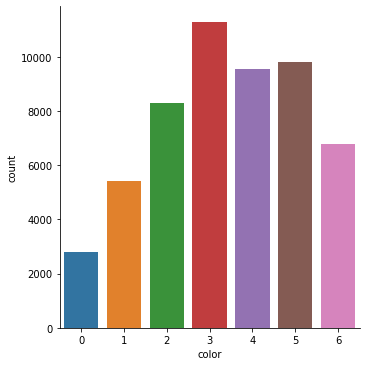

In [10]:
#your code here
sns.catplot(x="color", kind="count", data=diamonds)   

In [ ]:
#your comments here

## color 0 and 1 are the ones with less ocurrences
## color 3 is the most frequent

## 2.The `carat` column 

Let's check the `carat` (weight), since this could also be a potential factor for price change.

**Find the mean of each column for each value of `carat` using the `groupby` method. Then comment your results.**

In [11]:
#your code here
diamonds.groupby('carat').agg('mean')

,color,clarity,depth,table,price,x,y,z
carat,,,,,,,,
0.20,5.166667,2.833333,61.100000,59.333333,365.166667,3.786667,3.753333,2.303333
0.21,5.444444,2.666667,60.511111,58.444444,380.222222,3.874444,3.837778,2.332222
0.22,4.800000,2.600000,61.620000,60.400000,391.400000,3.898000,3.848000,2.386000
0.23,4.518771,4.901024,61.426621,58.034130,486.143345,3.946382,3.973379,2.431468
0.24,4.185039,4.972441,61.599213,57.488189,505.185039,3.990157,4.019331,2.465591
...,...,...,...,...,...,...,...,...
4.00,1.000000,0.000000,63.300000,58.000000,15984.000000,10.010000,9.940000,6.310000
4.01,0.500000,0.000000,61.750000,61.500000,15223.000000,10.080000,10.014754,6.205000
4.13,2.000000,0.000000,64.800000,61.000000,17329.000000,10.000000,9.850000,6.430000


In [ ]:
#your comments

## color seems to decrease with the increase of carat (inverse proporcionality)


**Plot a histogram of the `carat` column by using the `plot` method (see the docs to find an easy way to do so). What is happening?**

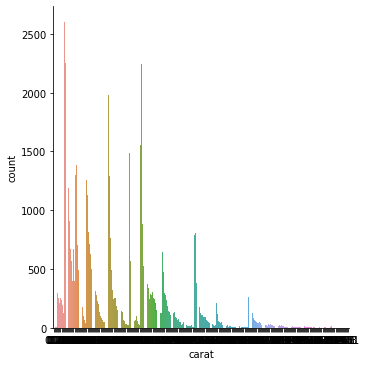

In [3]:
#your code here
sns.catplot(x="carat", kind="count", data=diamonds)   ## diamonds with lower carat are more common

# 3. The `table` and `clarity` column
Finally, let's check the `table`.

**Find the mean of each column for each value of `table` using the `groupby` method. Then comment your results.**

In [4]:
#your code here
diamonds.groupby('table').agg('mean')

,carat,color,clarity,depth,price,x,y,z
table,,,,,,,,
43.0,1.0400,1.0,4.00,62.90,4997.0,6.450,6.410,4.040
44.0,0.2900,5.0,4.00,62.80,474.0,4.200,4.240,2.650
49.0,0.6500,3.0,3.00,64.25,2290.5,5.355,5.320,3.425
50.0,1.5100,3.0,2.00,61.50,8995.5,7.380,7.295,4.510
50.1,0.9400,2.0,1.00,66.00,3353.0,6.130,6.170,4.060
...,...,...,...,...,...,...,...,...
71.0,0.6800,3.0,2.00,58.00,1633.0,5.850,5.700,3.350
73.0,0.6025,4.5,3.25,68.90,2406.5,5.520,5.465,3.745
76.0,0.7900,3.0,2.00,65.30,2362.0,5.520,5.130,3.350


In [ ]:
#your comments here
## doesnt seems to have a relation between the variation of table and the othe columns

**Finally, do the same with the `clarity` column.**

In [5]:
#your code here
diamonds.groupby('clarity').agg('mean')

,carat,color,depth,table,price,x,y,z
clarity,,,,,,,,
0,1.283846,2.968961,62.734278,58.303779,3924.168691,6.761093,6.709458,4.224688
1,1.077648,3.469980,61.772167,57.927181,5063.028606,6.404157,6.395603,3.952434
2,0.850482,3.448450,61.853042,57.662541,3996.001148,5.888383,5.888256,3.640636
3,0.763935,3.494208,61.724417,57.417401,3924.989395,5.658633,5.659782,3.492788
4,0.727158,3.161792,61.667458,57.315151,3839.455391,5.572860,5.580017,3.437925
5,0.596202,3.569483,61.663778,57.024990,3283.737071,5.218454,5.232118,3.221465
6,0.503321,3.351573,61.624651,56.884460,2523.114637,4.961721,4.976437,3.062132
7,0.505123,3.101676,61.510615,56.507207,2864.839106,4.968402,4.989827,3.061659


In [ ]:
#your comments here

## carat decreases with clarity
## depth decreases with clarity
## table decreases with clarity
## x,y and z decreases with clarity

**After looking at your results, which features do you think will affect price the most now? Regarding your hypotheses, do they match your final results? Provide a small overview.**

In [ ]:
#your thoughts here

## color and carat

# 4. Taking a deeper look with plots and correlations

To take deeper look, we will use the `pairplot` method of `seaborn` library. This method plots a scatterplot for each pair of features and in the diagonal the distribution of the feature.

So if you have many features it will take a while, be careful!


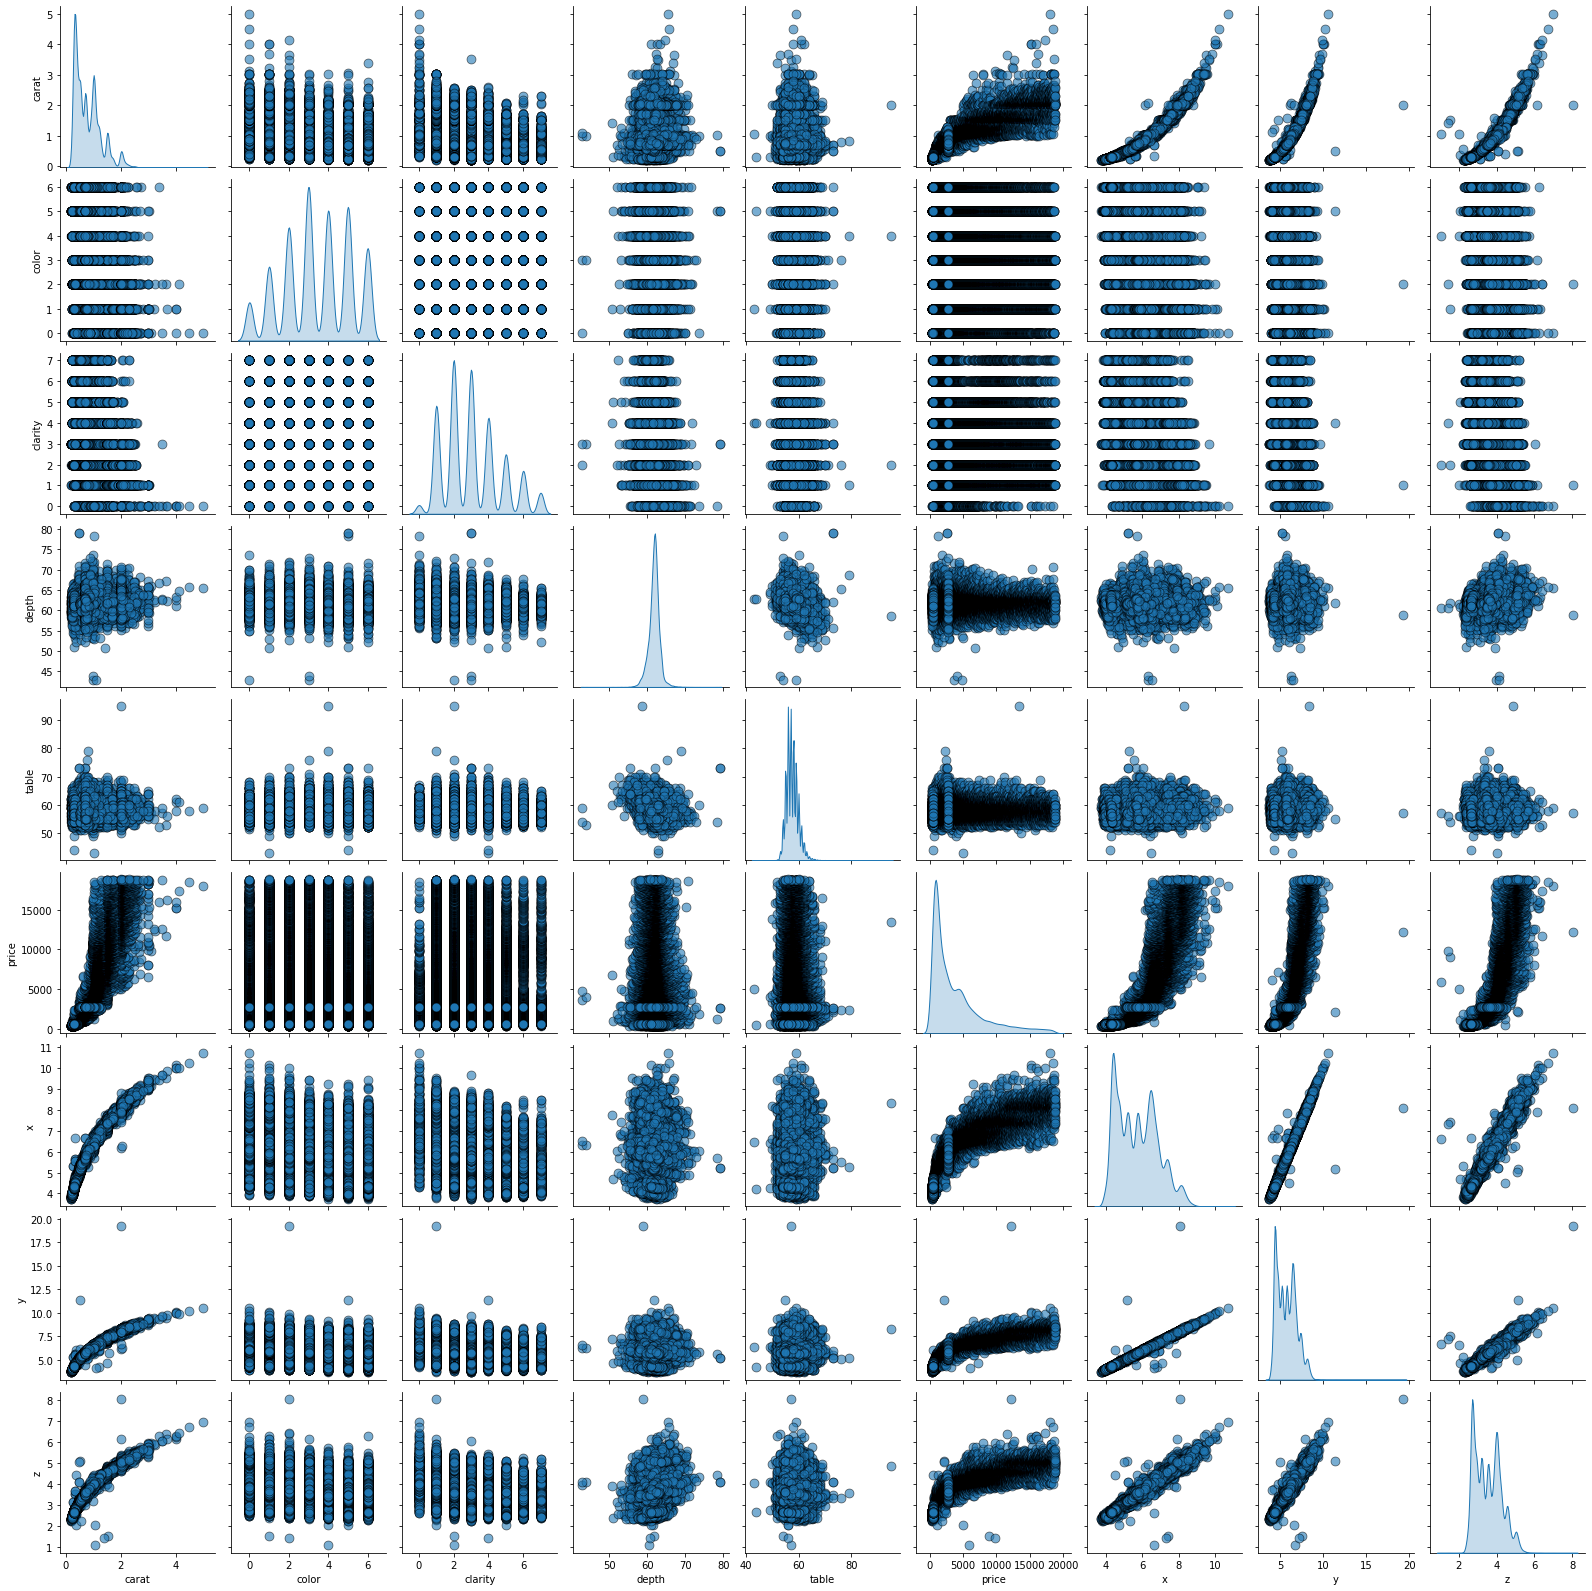

In [6]:
#Run this code
import seaborn as sns
sns.pairplot(diamonds, diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

**What do you see here? What relationships between variables are the most interesting?**

In [ ]:
#your thoughts here

## carat with x,y and z (linear relations)
## x,y and z between themself (we already know that depth expression relates these three variables)
## price with x,y,z and carat

Now we will see a correlation matrix with a plot. As you know a higher correlation means that the feature could be an effect (**but is not for sure**) for the changes on the price.

We will see this with a matrix with colors. A lighter color means greater correlation. 

This is done with the `seaborn` library as well.

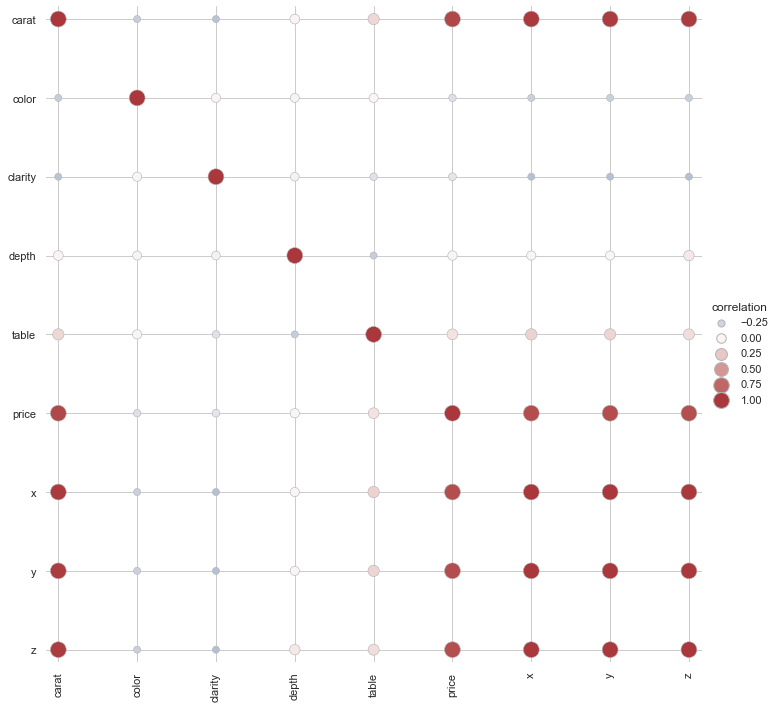

In [8]:
# your code here

## set theme
sns.set_theme(style="whitegrid")

# Compute a correlation matrix and convert to long-form
corr_mat = diamonds.corr().stack().reset_index(name="correlation")

# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")

**What do you see here? Regarding the results before, does it fit with them?**

In [ ]:
#your thoughts here

## yes, as said above:

## carat with x,y and z (linear relations)
## x,y and z between themself (we already know that depth expression relates these three variables)
## price with x,y,z and carat

Finally, we will calculate the linear regression between the price and the weight. This will be done first by plotting it with the `seaborn` library and then calculating the error with the `scipy` library.

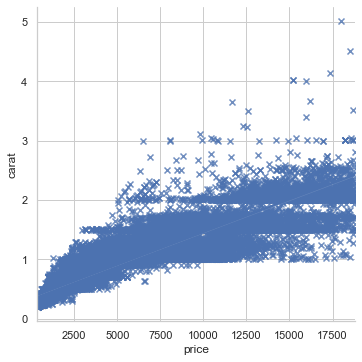

In [16]:
# your code here
sns.lmplot(x="price", y="carat", data=diamonds, markers=["x"])

In [12]:
stats.linregress(diamonds['price'],diamonds['carat'])

LinregressResult(slope=0.0001095002477001697, intercept=0.36729720416334344, rvalue=0.9215913011934712, pvalue=0.0, stderr=1.9858294668535732e-07, intercept_stderr=0.0011124589026091061)

**What do you think?**

In [14]:
#your thoughts here
## linear relationship between caract and price

**Would you do any other checks on other features? Do you have any comments regarding `carat`?**

In [ ]:
#your thoughts here

## probably x, y and z also, to see the possible relationship

**Conclusion**

**From our dataset** we can conclude that although `color` and `clarity` have a classification, and thus an assigned importance or weight, they do not influence the monetary value of a diamond in determining way. While it is true that different colors or clarities may have different prices, upon closer examination those variations in price seem to be linked to `carat` (weight) and its `dimensions`. In our analysis, the key factor to determining a diamond's value was placed solely in the aforementioned features, since we can see in our correlation coefficients and in the coefficient of determination that these features are closely related.